
Jumlah total data   : 144
Jumlah data latih   : 100 (69.44%)
Jumlah data uji     : 44 (30.56%)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score (accuracy): 0.85


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.52
SVM Cross-Validation Scores: [0.85 0.85 0.85 0.85 0.85]
SVM Mean CV Accuracy: 0.85
Logistic Regression Cross-Validation Scores: [0.5 0.5 0.5 0.5 0.6]
Logistic Regression Mean CV Accuracy: 0.52

Hasil Evaluasi Model (Format Tabel Mendatar):
                            Accuracy  Precision (0)  Recall (0)  F1-Score (0)  Precision (1)  Recall (1)  F1-Score (1)  Macro Average Precision  Macro Average Recall  Macro Average F1-Score
SVM Tuning                      0.84           0.84        1.00          0.91           0.00        0.00          0.00                     0.42                  0.50                    0.46
Logistic Regression Tuning      0.48           0.85        0.46          0.60           0.17        0.57          0.26                     0.51                  0.52                   

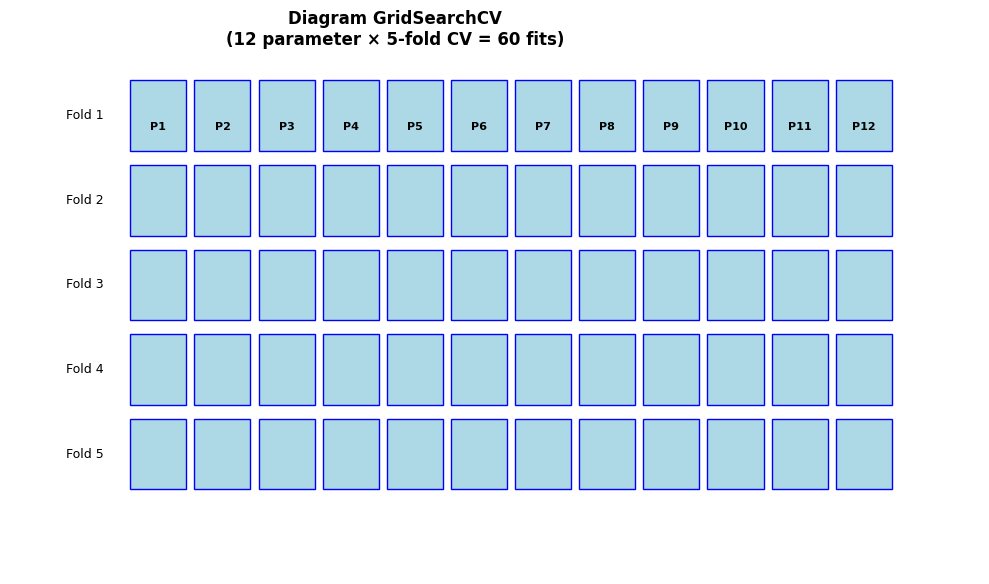


Confusion Matrix untuk SVM Tuning:


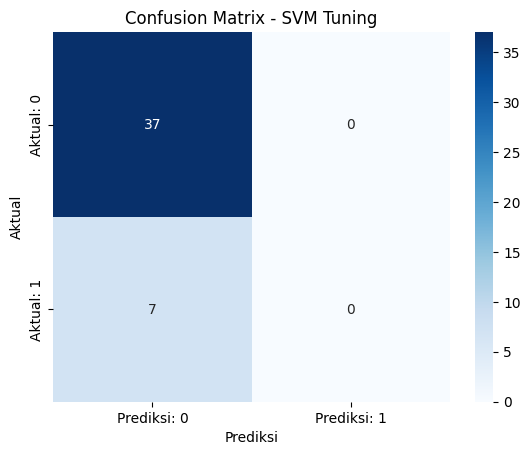


Confusion Matrix untuk Logistic Regression Tuning:


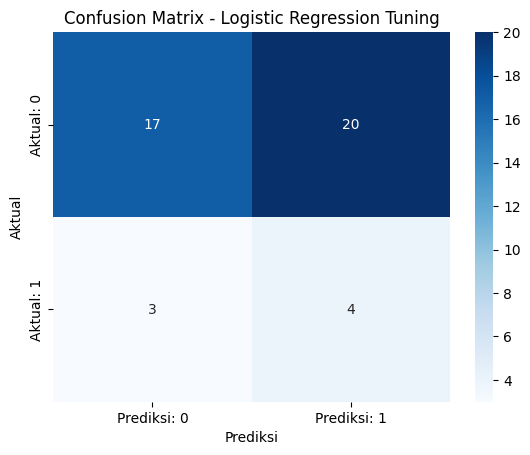


Confusion Matrix untuk Multinomial Naive Bayes:


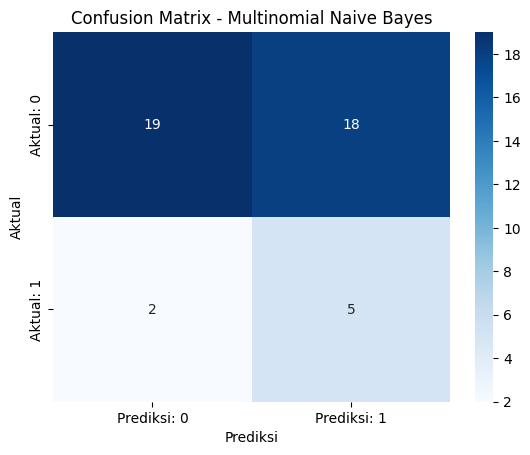

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1696\1584792974.py:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


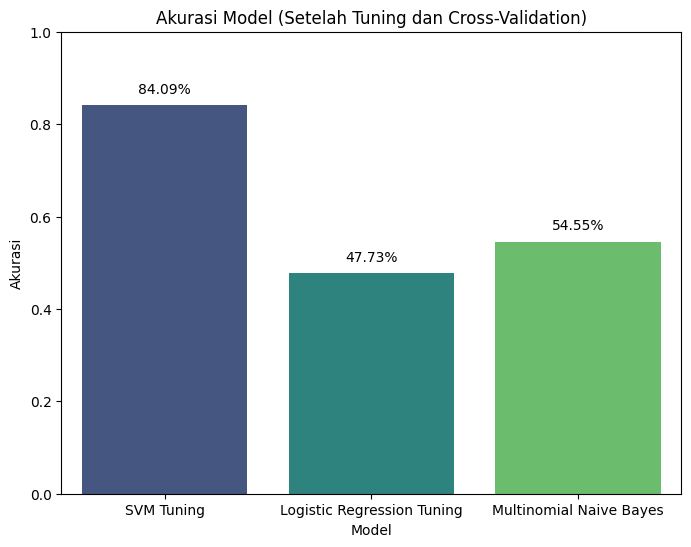


Pengaruh Variabel terhadap Kasus DBD (berdasarkan Logistic Regression):
Suhu (C): 0.3522
Kelembaban (%): -0.0825
Curah Hujan (mm): -0.6364
Bulan: -0.3071

Pentingnya Setiap Fitur dalam Model SVM:
              Fitur  Importance
0          Suhu (C)         0.0
1    Kelembaban (%)         0.0
2  Curah Hujan (mm)         0.0
3             Bulan         0.0


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1696\1584792974.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Fitur', palette='Blues_d')


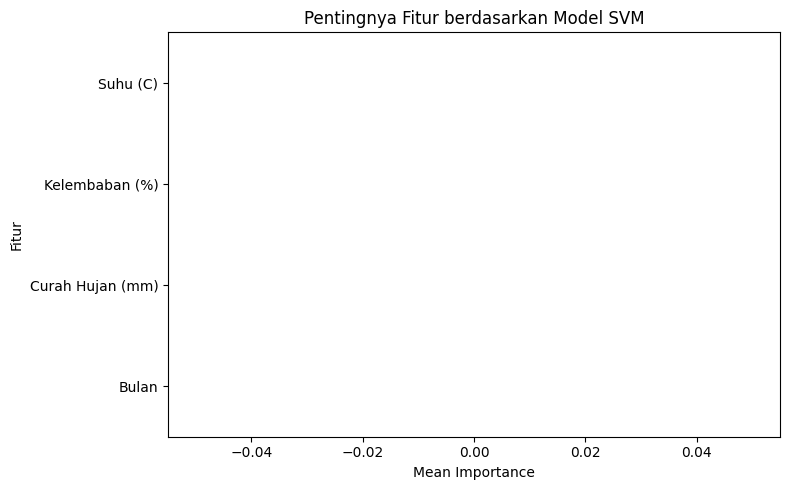

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Mengimpor data dari file Excel
df = pd.read_excel('D:\KULIAH 2023\PENELITIAN\File\data_dbd_purwokerto_2022_2024.xlsx')

# Mengubah target variabel (Jumlah Kasus DBD) menjadi biner (0 atau 1)
df['Kasus DBD (0=Tidak, 1=Ya)'] = (df['Jumlah Kasus DBD'] > 5).astype(int)

# Preprocessing Data
X = df[['Suhu (C)', 'Kelembaban (%)', 'Curah Hujan (mm)', 'Bulan']]  # Fitur
y = df['Kasus DBD (0=Tidak, 1=Ya)']  # Target

# Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan jumlah dan persentase data latih dan data uji
total_data = len(df)
train_size = len(X_train)
test_size = len(X_test)

print('\n=================================')
print(f"Jumlah total data   : {total_data}")
print(f"Jumlah data latih   : {train_size} ({train_size/total_data*100:.2f}%)")
print(f"Jumlah data uji     : {test_size} ({test_size/total_data*100:.2f}%)")
print('=================================\n')

# Standarisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, class_report, conf_matrix

# Menyimpan hasil evaluasi untuk semua model
results = {}

# Fungsi untuk menambahkan hasil evaluasi ke dictionary 'results'
def add_class_report_to_results(model_name, accuracy, class_report, conf_matrix, results_dict):
    results_dict[model_name] = {
        "Accuracy": accuracy,
        "Precision (0)": class_report['0']['precision'] if '0' in class_report else 0,
        "Recall (0)": class_report['0']['recall'] if '0' in class_report else 0,
        "F1-Score (0)": class_report['0']['f1-score'] if '0' in class_report else 0,
        "Precision (1)": class_report['1']['precision'] if '1' in class_report else 0,
        "Recall (1)": class_report['1']['recall'] if '1' in class_report else 0,
        "F1-Score (1)": class_report['1']['f1-score'] if '1' in class_report else 0,
        "Macro Average Precision": class_report['macro avg']['precision'],
        "Macro Average Recall": class_report['macro avg']['recall'],
        "Macro Average F1-Score": class_report['macro avg']['f1-score'],
        "Confusion Matrix": conf_matrix
    }

# 1. Tuning Parameter untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train_scaled, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score (accuracy):", grid_search_svm.best_score_)

best_svm = grid_search_svm.best_estimator_
accuracy, class_report, conf_matrix = evaluate_model(best_svm, X_train_scaled, X_test_scaled, y_train, y_test)
add_class_report_to_results('SVM Tuning', accuracy, class_report, conf_matrix, results)

# 2. Tuning Parameter untuk Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

logreg_model = LogisticRegression(class_weight='balanced')
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy', verbose=1)
grid_search_logreg.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best cross-validation score (accuracy):", grid_search_logreg.best_score_)

best_logreg = grid_search_logreg.best_estimator_
accuracy, class_report, conf_matrix = evaluate_model(best_logreg, X_train_scaled, X_test_scaled, y_train, y_test)
add_class_report_to_results('Logistic Regression Tuning', accuracy, class_report, conf_matrix, results)



from sklearn.naive_bayes import MultinomialNB

# Tanpa standardisasi untuk MultinomialNB
mnb_model = MultinomialNB()
accuracy, class_report, conf_matrix = evaluate_model(mnb_model, X_train, X_test, y_train, y_test)
add_class_report_to_results('Multinomial Naive Bayes', accuracy, class_report, conf_matrix, results)


# 4. Cross-validation untuk semua model terbaik
cv_scores_svm = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Mean CV Accuracy:", np.mean(cv_scores_svm))

cv_scores_logreg = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", cv_scores_logreg)
print("Logistic Regression Mean CV Accuracy:", np.mean(cv_scores_logreg))

# Menyusun DataFrame untuk hasil evaluasi dari ketiga model
results_df = pd.DataFrame(results).T

# Membulatkan nilai numerik ke 2 angka di belakang koma
results_df_rounded = results_df.copy()
for col in results_df_rounded.columns:
    if col != 'Confusion Matrix':
        results_df_rounded[col] = results_df_rounded[col].apply(lambda x: round(x, 2))

# Menampilkan DataFrame yang sudah dirapikan seperti tabel
print("\nHasil Evaluasi Model (Format Tabel Mendatar):")
print("=" * 120)
with pd.option_context('display.max_columns', None, 'display.width', 200):
    print(results_df_rounded.drop(columns='Confusion Matrix').to_string())
print("=" * 120)


import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Membuat diagram sederhana untuk menjelaskan GridSearchCV dengan 5-fold CV
fig, ax = plt.subplots(figsize=(10, 6))

# Simulasi 12 kombinasi parameter (ditampilkan sebagai kotak)
num_candidates = 12
num_folds = 5
spacing_x = 0.8
spacing_y = 1.2

for i in range(num_candidates):
    for j in range(num_folds):
        rect = patches.Rectangle((i * spacing_x, -j * spacing_y), 0.7, 1, linewidth=1, edgecolor='blue', facecolor='lightblue')
        ax.add_patch(rect)

# Menambahkan anotasi
for i in range(num_candidates):
    ax.text(i * spacing_x + 0.35, 0.3, f"P{i+1}", ha='center', fontsize=8, fontweight='bold')
for j in range(num_folds):
    ax.text(-0.8, -j * spacing_y + 0.5, f"Fold {j+1}", va='center', fontsize=9)

# Label dan keterangan
ax.text(num_candidates * spacing_x / 2 - 1.5, 1.5, "Diagram GridSearchCV\n(12 parameter × 5-fold CV = 60 fits)", fontsize=12, ha='center', fontweight='bold')
ax.set_xlim(-1.5, num_candidates * spacing_x + 1)
ax.set_ylim(-num_folds * spacing_y, 2)
ax.axis('off')

plt.tight_layout()
plt.show()


# Menampilkan Confusion Matrix
for model in results_df.index:
    print(f"\nConfusion Matrix untuk {model}:")
    conf_matrix = results_df.loc[model, 'Confusion Matrix']
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Visualisasi Akurasi Model setelah tuning dan cross-validation
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Akurasi Model (Setelah Tuning dan Cross-Validation)')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Agar skala akurasi tetap antara 0 dan 1

# Menambahkan label persentase akurasi pada setiap bar
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom')

plt.show()

# Menampilkan koefisien dan pengaruh masing-masing fitur pada Logistic Regression
feature_names = X.columns
coefficients = best_logreg.coef_[0]

print("\nPengaruh Variabel terhadap Kasus DBD (berdasarkan Logistic Regression):")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

# ini

from sklearn.inspection import permutation_importance

# Evaluasi pentingnya fitur berdasarkan model SVM
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=30, random_state=0)

# Menampilkan hasil
importance_df = pd.DataFrame({'Fitur': X.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nPentingnya Setiap Fitur dalam Model SVM:")
print(importance_df)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Fitur', palette='Blues_d')
plt.title("Pentingnya Fitur berdasarkan Model SVM")
plt.xlabel("Mean Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()




